In [1]:
%load_ext autoreload
%autoreload 2
import os

os.chdir("/home/sambray/Documents/MS_analysis_samsplaying/")
from AnalysisTables.trial_intervals import TrialIntervals
from AnalysisTables.decoding_tables import ClusterlessAheadBehindDistance
from Analysis.utils import (
    filter_opto_data,
    get_running_valid_intervals,
    smooth,
    weighted_quantile,
)
from Style.style_guide import animal_style, interval_style
from ms_opto_stim_protocol import OptoStimProtocol
from Analysis.lfp_analysis import power_spectrum

from spyglass.decoding.v1.clusterless import ClusterlessDecodingV1
from spyglass.common import TaskEpoch, PositionIntervalMap, interval_list_intersect


import numpy as np
import matplotlib.pyplot as plt

[2024-09-23 12:00:15,980][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2024-09-23 12:00:16,020][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306


In [3]:
# missing_clusterless

# [
#     "Totoro20220613_.nwb",
#     "Winnit20220719_.nwb",
# ]

In [5]:
# key_pairs[-1]
# trial_keys

# Trial based intervals (WTRACK only)

datasets: 9


[2024-09-23 12:01:06,733][WARNING]: Skipped checksum for file with hash: 1891a68c-5e0e-da6a-7721-a6a921e9f8f9, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_d58b6d3a-e1a7-47d6-9387-8b0d6bde66f2.nc
[2024-09-23 12:01:08,568][WARNING]: Skipped checksum for file with hash: f3ccbe30-c62a-ce67-4b1c-acb2419b9ee4, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_3cd57781-04fb-4d0b-9663-ccd7d92e0f0a.nc
[2024-09-23 12:01:09,700][WARNING]: Skipped checksum for file with hash: d6c50ae6-70f1-69c9-a97a-0dea3220654a, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_e42664ef-7a60-4461-85bc-27afe6dac42a.nc
[2024-09-23 12:01:10,941][WARNING]: Skipped checksum for file with hash: 9820ce77-4c92-a7c0-dd5c-89fc7f3e3535, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_a49db0ff-a836-493b-b167-0eddc18f3715.nc
[2024-09-23 12:01:12,109][WARNING]: Skipped checksum for file with hash: ec341a98-224a-ec3f-51b7-6870564a4625, and path: /stelmo/nwb/analysis/Winnie2022

datasets: 9


[2024-09-23 12:01:20,085][WARNING]: Skipped checksum for file with hash: 0644e3ac-da22-f181-be94-57e2e9214541, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_ee5595eb-d776-4cff-9015-dd165a5734bd.nc
[2024-09-23 12:01:21,794][WARNING]: Skipped checksum for file with hash: 59127b15-13f3-f7e5-3f46-a25717806543, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_f4991e01-32c9-4bd5-9440-d1e77d8c1b06.nc
[2024-09-23 12:01:23,543][WARNING]: Skipped checksum for file with hash: cc3a5569-9880-e01a-8f69-db2811911e95, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_11e6ba34-a9c1-4b02-b3a2-181e5027c8dc.nc
[2024-09-23 12:01:25,788][WARNING]: Skipped checksum for file with hash: 90bc0f3d-98a9-1bc8-0236-673292eb6456, and path: /stelmo/nwb/analysis/Frodo20230814/Frodo20230814_0604f183-db1e-4d78-afc9-b284057bd2ad.nc
[2024-09-23 12:01:27,567][WARNING]: Skipped checksum for file with hash: 40ab1332-c908-afc6-07ab-3524c601532c, and path: /stelmo/nwb/analysis/Frodo20230814/Frod

datasets: 10


[2024-09-23 12:01:38,714][WARNING]: Skipped checksum for file with hash: 5b9cf3ca-139e-6d13-fe34-bb7770122795, and path: /stelmo/nwb/analysis/Totoro20220613/Totoro20220613_28072a59-be8b-4546-acb5-eca12e67eecb.nc
[2024-09-23 12:01:40,232][WARNING]: Skipped checksum for file with hash: b8351995-5a26-698b-40d2-ee31d0b077ad, and path: /stelmo/nwb/analysis/Totoro20220613/Totoro20220613_c1f7cb04-40d5-4827-a397-24e335655ce1.nc
[2024-09-23 12:01:41,769][WARNING]: Skipped checksum for file with hash: cd092c62-3655-a9aa-8056-a6a237522d32, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_5a09e7ce-c275-480a-9237-7607911caeeb.nc
[2024-09-23 12:01:43,169][WARNING]: Skipped checksum for file with hash: 814efa28-d2e1-c4be-59be-0e9257a90853, and path: /stelmo/nwb/analysis/Totoro20220614/Totoro20220614_20841aa0-895b-4223-8af9-424a197e9b76.nc
[2024-09-23 12:01:44,464][WARNING]: Skipped checksum for file with hash: 6da4cfa7-6a1a-78c8-9b0b-1a0179141174, and path: /stelmo/nwb/analysis/Totoro2022

datasets: 10
No clusterless decoding {'nwb_file_name': 'Wallie20220922_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Wallie20220922_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2024-09-23 12:01:55,247][WARNING]: Skipped checksum for file with hash: 3618b0a3-a76a-86d8-da56-ad6f3e137355, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_42357b8b-54ec-4953-9ab3-bfbfdf5201ad.nc
[2024-09-23 12:01:56,545][WARNING]: Skipped checksum for file with hash: 3e199b8e-5b77-add1-ae91-2df46e3a6241, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_c73bd737-d2d2-4c89-a8be-f52b32f5f882.nc
[2024-09-23 12:01:58,428][WARNING]: Skipped checksum for file with hash: 58ffbab6-d20f-178a-5c93-c07bb34a49ae, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_8ed76e87-7b83-40f2-ae94-ec4be25b63b3.nc
[2024-09-23 12:01:59,747][WARNING]: Skipped checksum for file with hash: 4342eef7-df75-13dc-256b-5e0c3dcbff6f, and path: /stelmo/nwb/analysis/Wallie20220922/Wallie20220922_82158828-250d-446d-b0e8-2567bb7efd61.nc
[2024-09-23 12:02:01,137][WARNING]: Skipped checksum for file with hash: 85c41671-2cbf-58d8-f178-fe2d4830eb26, and path: /stelmo/nwb/analysis/Wallie2022

datasets: 8


[2024-09-23 12:02:09,565][WARNING]: Skipped checksum for file with hash: 2cab4880-17da-4e82-63ba-996a7bbbffa3, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_896f6510-064f-4ba4-a004-7c66a0ccc836.nc
[2024-09-23 12:02:11,054][WARNING]: Skipped checksum for file with hash: faf54e03-fec2-97a9-d728-b1a8c7715225, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_a926398a-e38b-45a2-86ed-47c5fbeaf084.nc


No ahead behind distance [{'nwb_file_name': 'Olive20220711_.nwb', 'waveform_features_group_name': '14_wtrack', 'position_group_name': 'DLC pos 13 valid times', 'decoding_param_name': 'ms_wtrack_contfrag_clusterless_causal', 'encoding_interval': 'pos 13 valid times', 'decoding_interval': 'pos 13 valid times', 'estimate_decoding_params': 0}]


[2024-09-23 12:02:12,420][WARNING]: Skipped checksum for file with hash: 3a5ec76e-66ef-57e3-098a-1a6e04d6468b, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_5b2b9c82-1e76-4d29-a4fc-f02db150da61.nc
[2024-09-23 12:02:13,753][WARNING]: Skipped checksum for file with hash: c10048af-56e5-a06a-f9d7-317c69fad593, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_3b3621b5-8da9-44d0-9af2-c48c44abc34a.nc
[2024-09-23 12:02:15,246][WARNING]: Skipped checksum for file with hash: 2e84963b-b851-f9ad-bede-0add3944f8c1, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_b4fee1d6-1536-496d-9434-9a19a8cf5b2f.nc
[2024-09-23 12:02:16,669][WARNING]: Skipped checksum for file with hash: 4275ba72-359f-2f15-6708-d1c20917a071, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_145126e3-1343-4505-83c4-3671fd9d2d86.nc
[2024-09-23 12:02:18,183][WARNING]: Skipped checksum for file with hash: b782fead-16f5-23c4-9274-e7ad8ff568b5, and path: /stelmo/nwb/analysis/Olive20220711/Oliv

datasets: 16
No clusterless decoding {'nwb_file_name': 'Yoshi20220518_.nwb', 'position_interval_name': 'pos 15 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2024-09-23 12:02:22,167][WARNING]: Skipped checksum for file with hash: f603f284-bbd0-3294-d85a-7b472e3dd316, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_b091e6e9-b5fb-4353-bfc4-a00a702ab342.nc
[2024-09-23 12:02:23,924][WARNING]: Skipped checksum for file with hash: 07a2b8c3-8495-f785-fc0c-2aa27746cff6, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_4d057708-815e-4a1a-a803-0215fa1c7018.nc
[2024-09-23 12:02:25,227][WARNING]: Skipped checksum for file with hash: d0cda010-997b-defb-a997-0a8b22bd5ac4, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_f0480113-3ac8-426b-96ce-29803ffe6a25.nc
[2024-09-23 12:02:26,599][WARNING]: Skipped checksum for file with hash: 283c8376-7ed7-2cff-8509-00699051d68b, and path: /stelmo/nwb/analysis/Yoshi20220517/Yoshi20220517_fb9d0b37-8621-4ef4-a1a5-a2fefd59c3ac.nc
[2024-09-23 12:02:27,865][WARNING]: Skipped checksum for file with hash: 2adb6769-ec14-3fa0-7e32-1b2977b7aeb7, and path: /stelmo/nwb/analysis/Yoshi20220517/Yosh

datasets: 8


[2024-09-23 12:02:45,469][WARNING]: Skipped checksum for file with hash: e8b5b079-38d9-5f15-ef47-ebbeb1d73637, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_49e1fa2c-352c-4c8c-812b-fb1ac7acf9d9.nc
[2024-09-23 12:02:47,415][WARNING]: Skipped checksum for file with hash: 03329964-8979-0d0d-aa61-f50a7df8c486, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_98f5ef2b-4d00-4ed1-a3a1-8e2fb668ab8d.nc
[2024-09-23 12:02:49,454][WARNING]: Skipped checksum for file with hash: f9ee702c-b72f-432b-be8f-c9e74cdf5ae9, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_6b60fa1e-4fa4-4d78-a6cf-47391e87dddf.nc
[2024-09-23 12:02:51,456][WARNING]: Skipped checksum for file with hash: 8de16839-1944-f6d7-0daf-96d7b2d1d168, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_358f639a-35b8-408d-9645-422e3f3049bd.nc
[2024-09-23 12:02:53,467][WARNING]: Skipped checksum for file with hash: b012270a-2892-dbf5-1e7c-7128954a5bcf, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilb

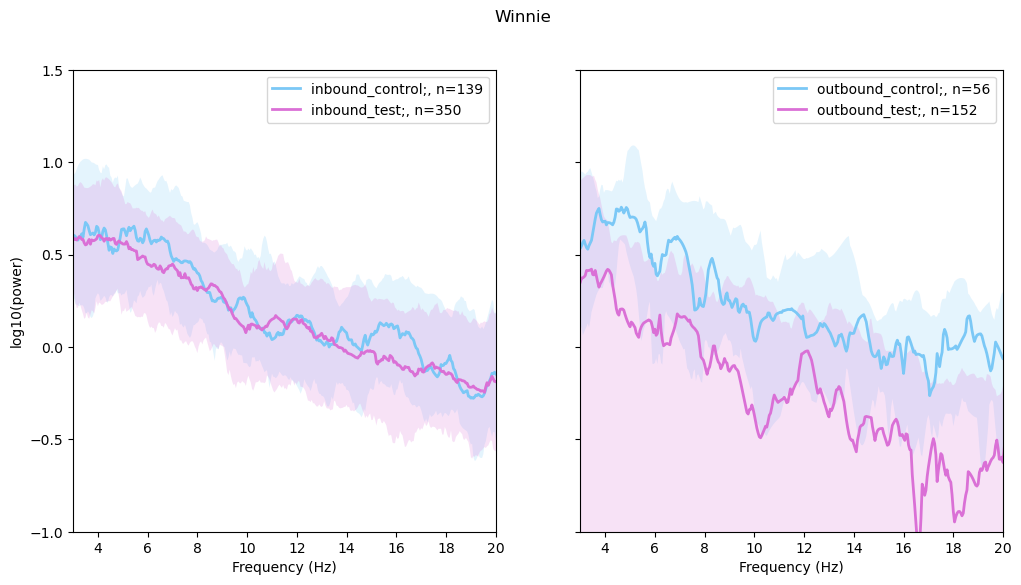

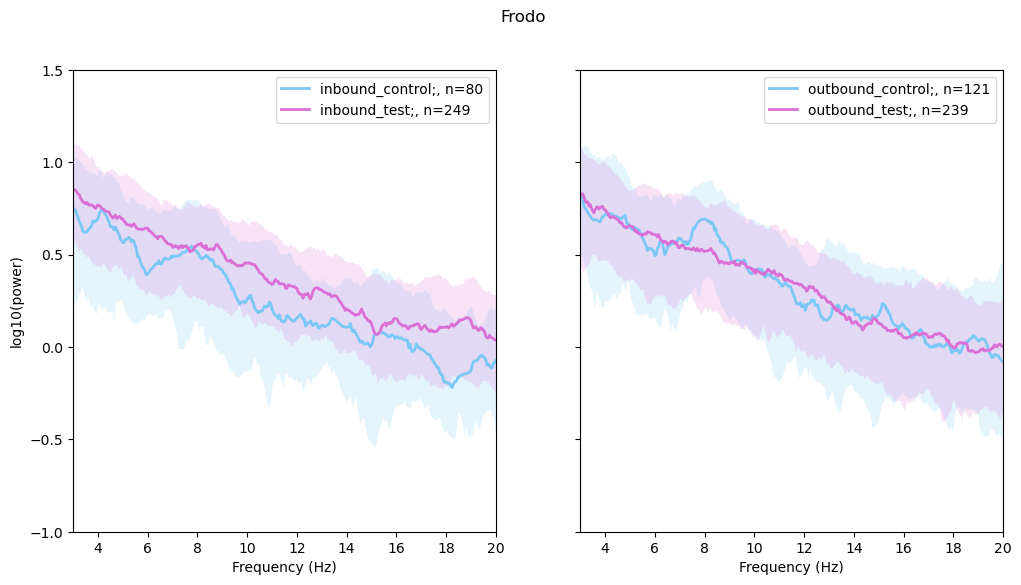

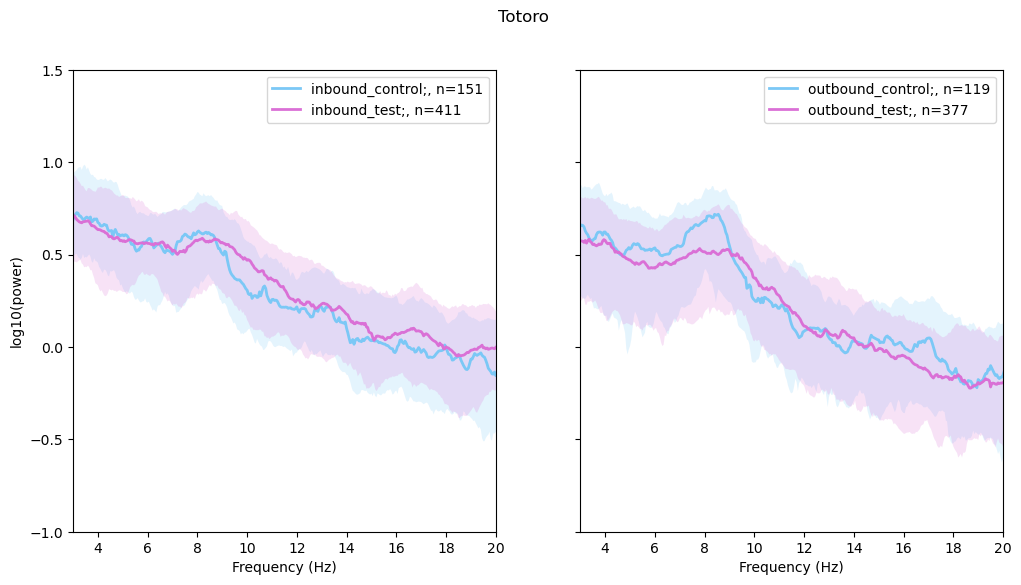

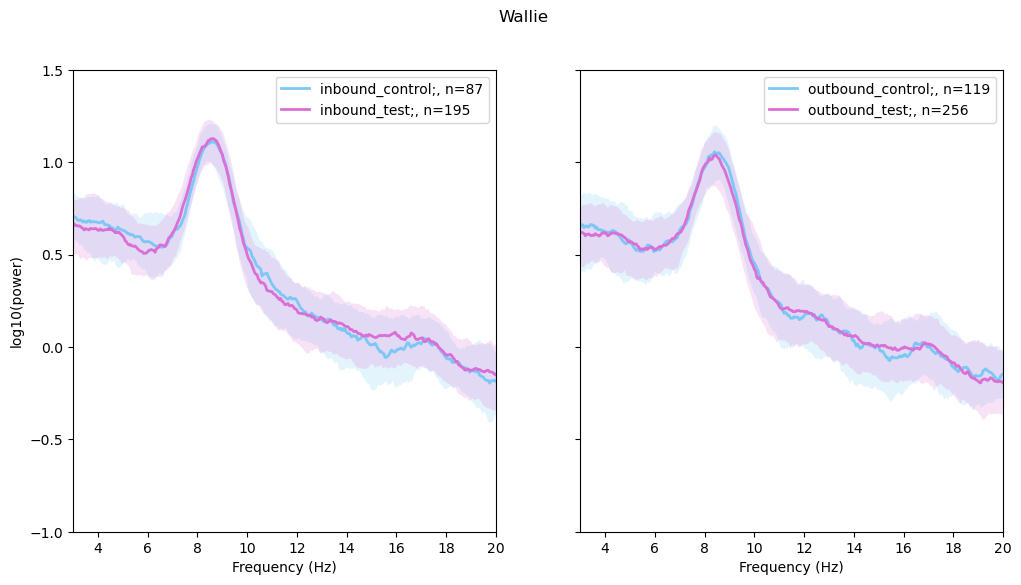

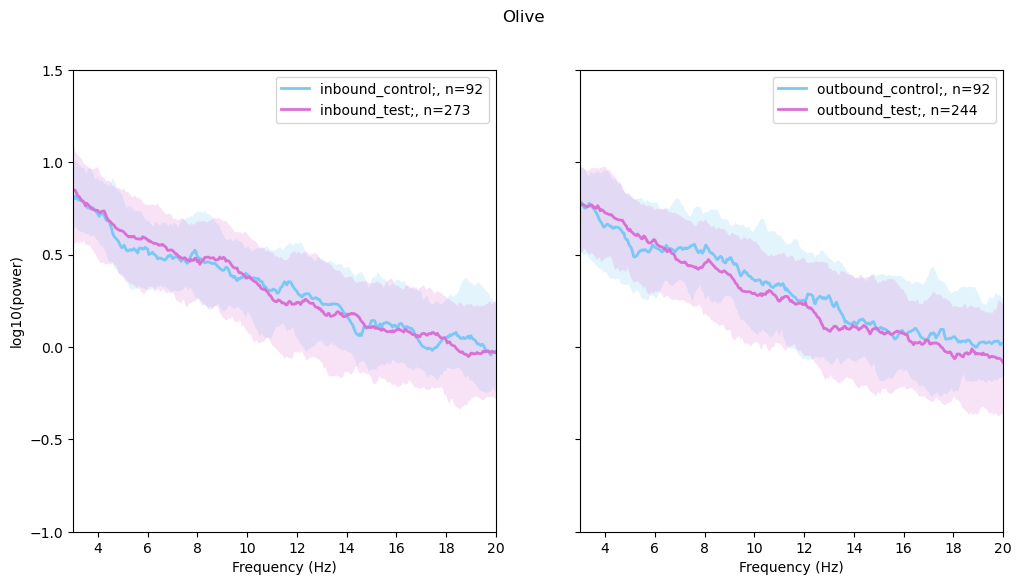

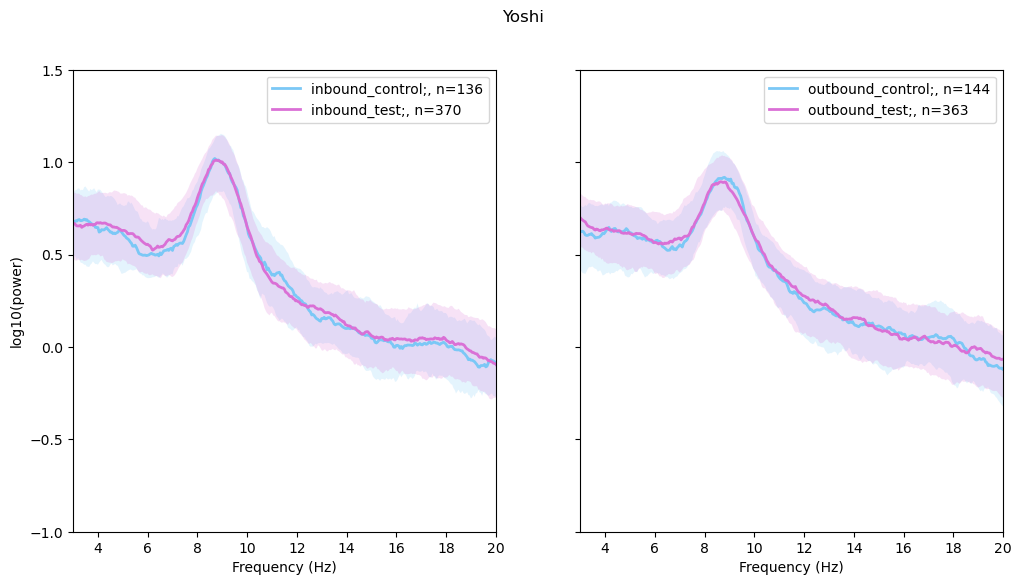

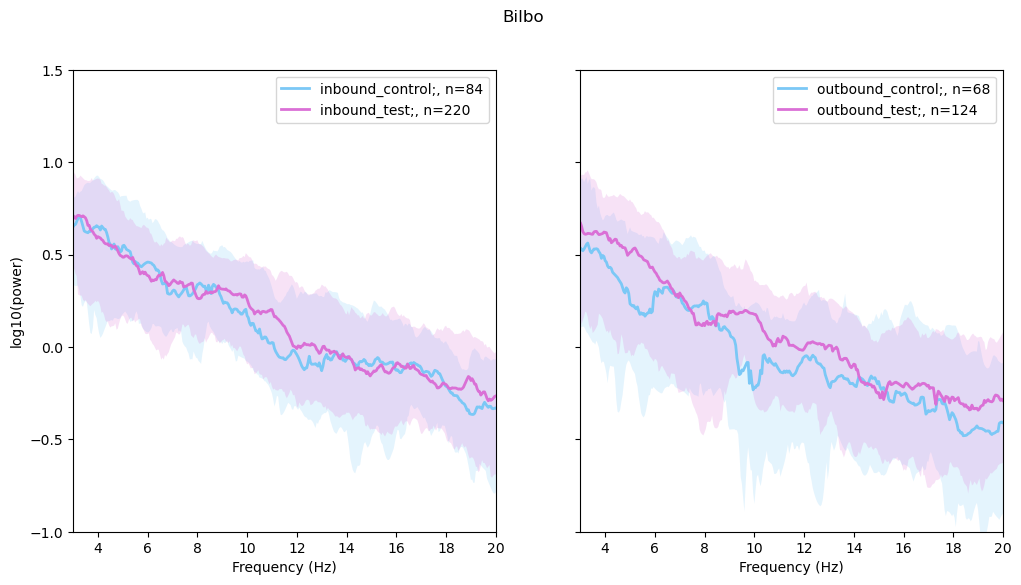

In [6]:
track_type = "early_wtrack"
# track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # _opto_test_interval"
dlc_pos = True

animal_list = animal_style.index
# animal_list = ["Winnie"
# animal_list = ["Totoro"]
# animal_list = ["Frodo"]

missing_clusterless = []
missing_ahead_behind = []

for animal in animal_list:
    if animal in ["Banner", "Odins", "Dan"]:
        continue
    dataset_key = {"animal": animal, "track_type": track_type, "targeted_phase": 90}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

        trial_keys = (
            TrialIntervals()
            * (TaskEpoch * (PositionIntervalMap() & key)).proj(
                waveform_features_group_name="interval_list_name"
            )
        ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)
        # if not len(trial_keys):
        #     print("No trial keys", key)
        #     continue

        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                ClusterlessDecodingV1()
                # & "position_group_name LIKE 'DLC%'"
                & {"nwb_file_name": key["nwb_file_name"]}
                & {"position_group_name": pos_group_name}
                & f"encoding_interval LIKE '%valid times{encoding_tag}'"
                # & trial_keys
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = [query.fetch1("KEY") for k in trial_keys]
        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((trial_keys, clusterless_keys, opto_key))
    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        trial_key, clusterless_key, opto_key = key_pairs[i]

        outbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "outbound_trial_intervals"
        )
        inbound_intervals = (TrialIntervals() & trial_key).fetch1(
            "inbound_trial_intervals"
        )

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key, filter_speed=run_filter, seperate_optogenetics=False, dlc_pos=True
        )
        run_intervals = np.array(run_intervals)

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            for trial_list, trial_type in zip(
                [outbound_intervals, inbound_intervals],
                ["outbound", "inbound"],
            ):
                if not len(trial_list):
                    continue
                interval_type = f"{trial_type}_{opto_type}"
                interval_list = interval_list_intersect(
                    np.array(trial_list), np.array(opto_interval)
                )
                if not len(interval_list):
                    continue

                if run_filter:
                    interval_list = interval_list_intersect(
                        interval_list, run_intervals
                    )

                spectrums = []
                weights = []

                for interval in interval_list:
                    rng = np.digitize(interval, results.time)
                    if rng[1] - rng[0] < window_size:
                        continue
                    if interval[1] - interval[0] > max_trial_length:
                        continue
                    f, power, weight = power_spectrum(
                        data=ahead_behind[rng[0] : rng[1]],
                        window_size=window_size,
                        sampling_rate=500,
                    )
                    spectrums.append(power)
                    weights.append(weight)
                spectrums = np.array(spectrums)
                weights = np.array(weights)

                if interval_type not in spectrum_results:
                    spectrum_results[interval_type] = {"spectrums": [], "weights": []}
                # if
                assert spectrums.shape[0] == weights.shape[0]
                spectrum_results[interval_type]["spectrums"].extend(spectrums)
                spectrum_results[interval_type]["weights"].extend(weights)

    # plot the results
    if not spectrum_results:
        continue
    fig, ax_list = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]
        if "inbound" in name:
            ax = ax_list[0]
        else:
            ax = ax_list[1]
        weights = np.array(result["weights"])
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    ax_list[1].legend()
    fig.suptitle(animal)
    for a in ax_list:
        a.set_xlabel("Frequency (Hz)")
        a.legend()
        a.set_ylim(-1, 1.5)
    ylabel = "log10(power)" if plot_log else "power"
    ax_list[0].set_ylabel(ylabel)

    # plt.xlim(3, 15)

    # plt.ylim(-10,10)

In [8]:
(
    ClusterlessDecodingV1()
    & "position_group_name LIKE 'DLC%'"
    # & "encoding_interval LIKE '%valid times'"
    & trial_keys
)

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_opto_control_interval,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_opto_test_interval,pos 9 valid times,0,=BLOB=,=BLOB=
Frodo20230814_.nwb,10_wtrack,DLC pos 9 valid times,ms_wtrack_2023_contfrag_clusterless_causal,pos 9 valid times_stimulus_on_interval,pos 9 valid times,0,=BLOB=,=BLOB=


In [39]:
missing_clusterless

[{'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 1 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 11 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 15 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 17 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 3 valid times',
  'dio_event_name': 'stim',
  'opto_infer_params_name': 'default_phase_targeting'},
 {'nwb_file_name': 'Frodo20230814_.nwb',
  'position_interval_name': 'pos 5 valid times',
  'dio_event_name': 'stim',
  'opto_i

(3.0, 8.0)

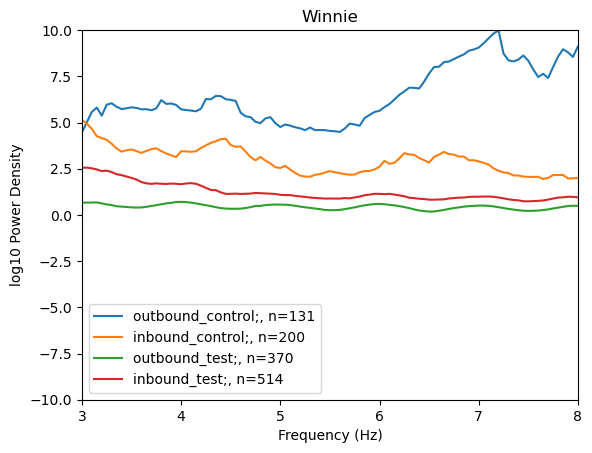

In [25]:
# plot the results
fig = plt.figure()
for name, result in spectrum_results.items():

    weights = np.array(result["weights"])
    power = result["spectrums"] * f
    # power = np.log10(power)
    ind = ~np.isnan(power).any(axis=1)
    power = power[ind]

    mid = np.average(power, axis=0, weights=weights[ind])
    mid = np.average(
        power,
        axis=0,
    )  # weights=weights)
    mid = np.median(power, axis=0)

    mid = np.array(
        [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    )
    # low = np.array(
    #     [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    # )
    # high = np.array(
    #     [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    # )
    plt.plot(f, mid, label=f"{name};, n={len(result['spectrums'])}")
    # plt.fill_between(f, low, high, alpha=0.5)

plt.xlim(3, 20)
plt.legend()
plt.title(animal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("log10 Power Density")
# plt.xlim(3, 15)

plt.ylim(-10, 10)

plt.xlim(3, 8)

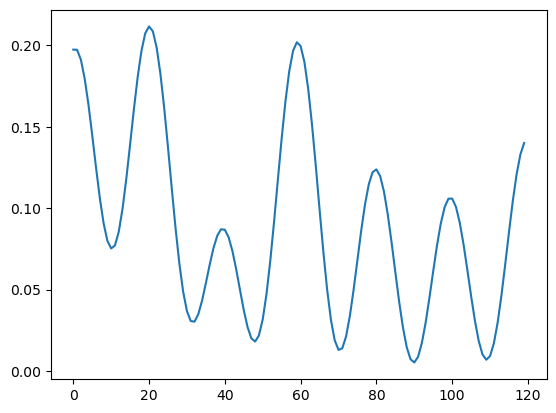

In [34]:
power[:, 1:].min()

power[:, 1:].max()

power[:, 1:].mean()
plt.plot(power[0, 80:200])

# Run and optogenetic intervals:

datasets: 3
No clusterless decoding {'nwb_file_name': 'Winnie20220713_.nwb', 'position_interval_name': 'pos 9 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
No clusterless decoding {'nwb_file_name': 'Winnie20220714_.nwb', 'position_interval_name': 'pos 7 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
linear_limits [10, 126.8923664781934]
datasets: 2
linear_limits [10, 123.30416347586447]
linear_limits [10, 123.30416347586447]
datasets: 2
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
datasets: 2
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
datasets: 4
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
datasets: 2
linear_limits [10, 126.8923664781934]
linear_limits [10, 126.8923664781934]
datasets: 1
linear_limits [10, 123.30416347586447]


ValueError: array of sample points is empty

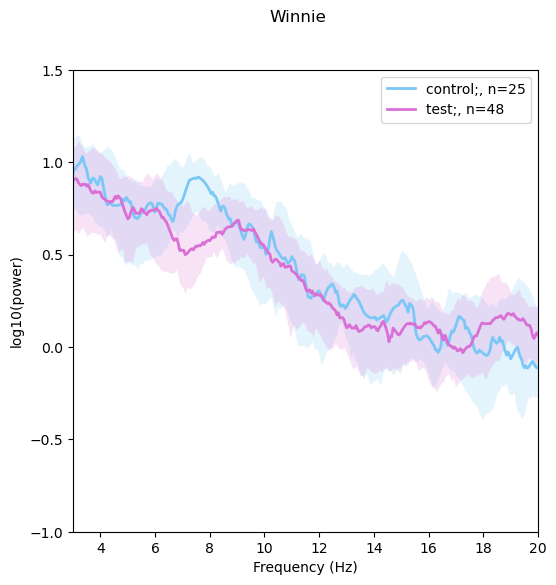

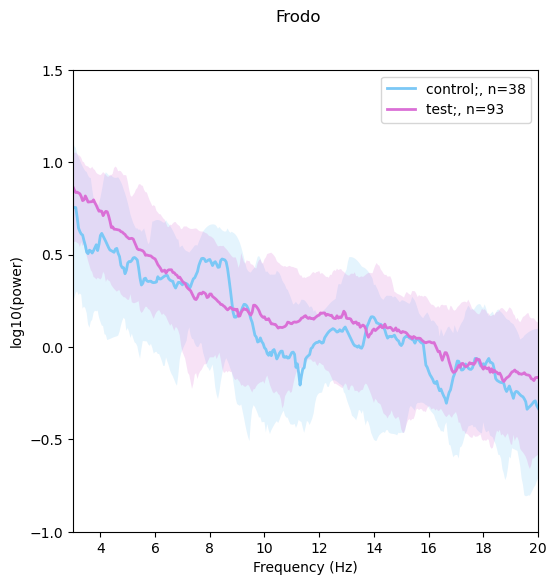

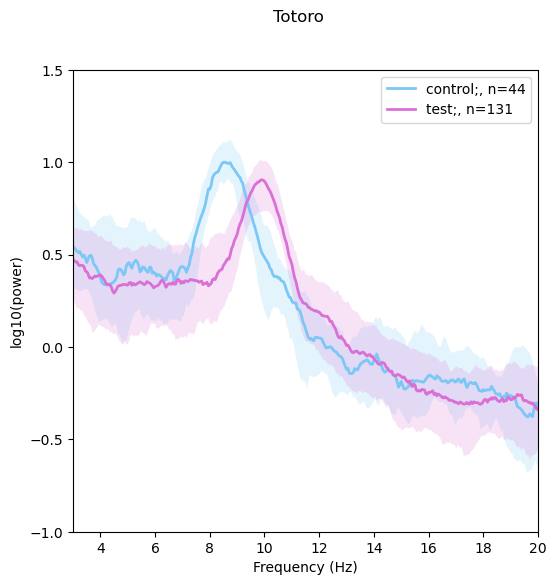

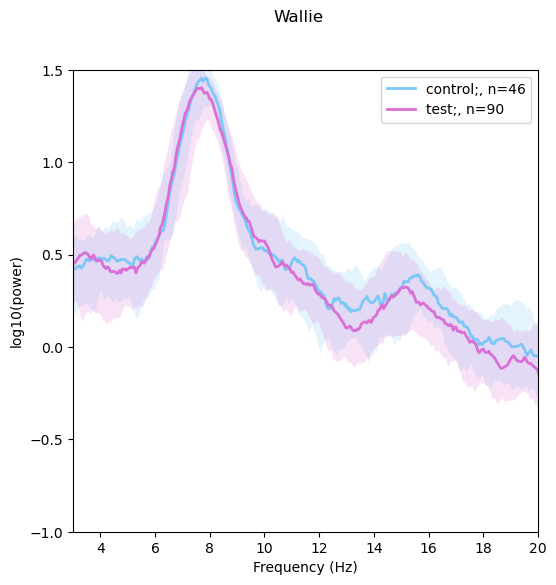

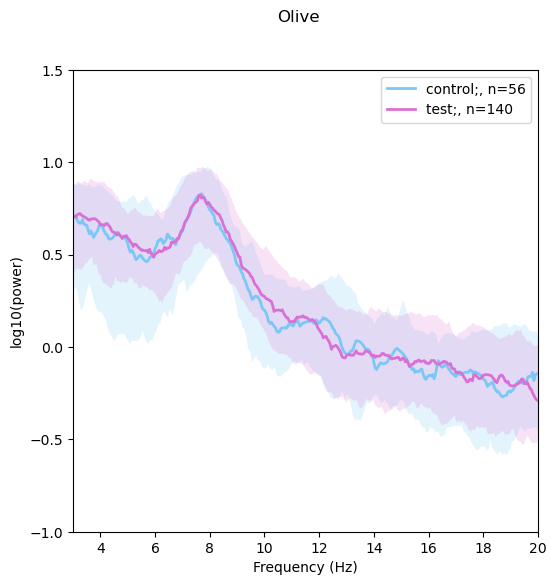

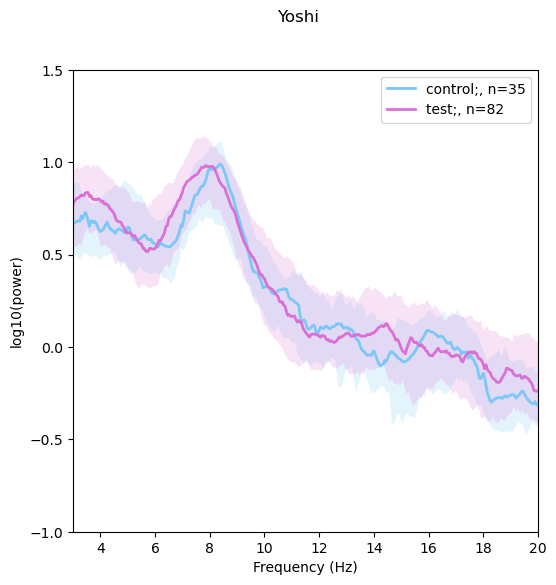

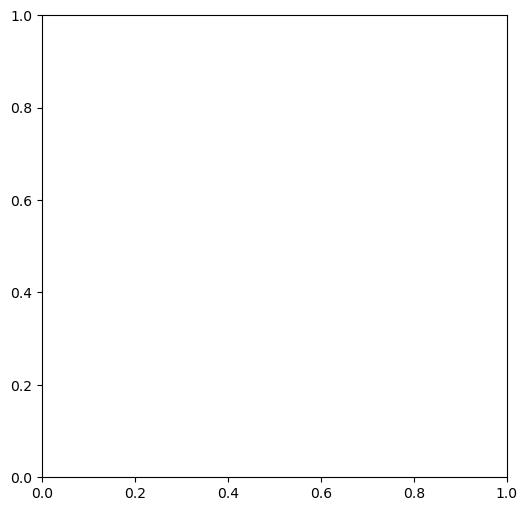

In [8]:
# track_type = "early_wtrack"
track_type = "lineartrack"
window_size = 500
max_trial_length = 20
run_filter = 10
clip_distance = 10
smooth_distance = 0
weighted = False
plot_log = True
encoding_tag = ""  # _opto_test_interval"
dlc_pos = False
base_key = {
    "track_type": track_type,
    # "targeted_phase": 90,
    "period_ms": 100,
    "min_pulse_length": 20,
}


animal_list = animal_style.index
# animal_list = ["Winnie"
# animal_list = ["Totoro"]
# animal_list = ["Frodo"]

missing_clusterless = []
missing_ahead_behind = []

for animal in animal_list:
    if animal in ["Banner", "Odins", "Dan"]:
        continue
    dataset_key = {"animal": animal, **base_key}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):
        pos_group_name = (
            "DLC " + key["position_interval_name"]
            if dlc_pos
            else key["position_interval_name"]
        )
        if not (
            query := (
                ClusterlessDecodingV1()
                # & "position_group_name LIKE 'DLC%'"
                & {"nwb_file_name": key["nwb_file_name"]}
                & {"position_group_name": pos_group_name}
                & f"encoding_interval LIKE '%valid times{encoding_tag}'"
                & "decoding_param_name LIKE '%causal'"
                # & trial_keys
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue
        clusterless_keys = query.fetch1("KEY")
        opto_key = key.copy()
        opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
        key_pairs.append((clusterless_keys, opto_key))
    spectrum_results = {}

    # run analysis across key sets
    for i in range(len(key_pairs)):
        clusterless_key, opto_key = key_pairs[i]

        control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
            "control_intervals", "test_intervals"
        )

        if not (ClusterlessAheadBehindDistance() & clusterless_key):
            print("No ahead behind distance", clusterless_key)
            missing_ahead_behind.append(clusterless_key)
            continue
        ahead_behind = np.squeeze(
            (ClusterlessAheadBehindDistance() & clusterless_key)
            .fetch1_dataframe()
            .values
        )
        if clip_distance:
            ahead_behind = np.clip(ahead_behind, -clip_distance, clip_distance)
        if smooth_distance:
            ahead_behind = smooth(
                ahead_behind, smooth_distance * 3, smooth_distance, hamming=True
            )
        results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
        ahead_behind.shape, results.time.shape

        run_intervals = get_running_valid_intervals(
            opto_key,
            filter_speed=run_filter,
            seperate_optogenetics=False,
            dlc_pos=dlc_pos,
        )
        run_intervals = np.array(run_intervals)

        for opto_interval, opto_type in zip(
            [control_intervals, test_intervals], ["control", "test"]
        ):
            interval_type = opto_type
            interval_list = np.array(opto_interval)
            if not len(interval_list):
                continue

            if run_filter:
                interval_list = interval_list_intersect(
                    interval_list,
                    run_intervals,
                )

            spectrums = []
            weights = []

            for interval in interval_list:
                rng = np.digitize(interval, results.time)
                if rng[1] - rng[0] < window_size:
                    continue
                if interval[1] - interval[0] > max_trial_length:
                    continue
                f, power, weight = power_spectrum(
                    data=ahead_behind[rng[0] : rng[1]],
                    window_size=window_size,
                    sampling_rate=500,
                )
                spectrums.append(power)
                weights.append(weight)
            spectrums = np.array(spectrums)
            weights = np.array(weights)

            if interval_type not in spectrum_results:
                spectrum_results[interval_type] = {"spectrums": [], "weights": []}
            # if
            assert spectrums.shape[0] == weights.shape[0]
            spectrum_results[interval_type]["spectrums"].extend(spectrums)
            spectrum_results[interval_type]["weights"].extend(weights)

    # plot the results
    if not spectrum_results:
        continue
    fig, ax = plt.subplots(ncols=1, figsize=(6, 6), sharex=True, sharey=True)
    for name, result in spectrum_results.items():
        if "control" in name:
            color = interval_style["control"]
        else:
            color = interval_style["test"]

        weights = np.array(result["weights"])
        power = result["spectrums"] * f
        if plot_log:
            power = np.log10(power)
        ind = np.logical_and(
            ~np.isnan(power).any(axis=1), ~np.isinf(power[:, 1:]).any(axis=1)
        )
        power = power[ind]

        if weighted:
            mid = np.average(power, axis=0, weights=weights[ind])
        else:
            mid = np.average(
                power,
                axis=0,
            )  # weights=weights)

        mid = np.array(
            [
                weighted_quantile(power[:, ii], 0.5, weights)
                for ii in range(power.shape[1])
            ]
        )
        low = np.array(
            [
                weighted_quantile(power[:, ii], 0.25, weights)
                for ii in range(power.shape[1])
            ]
        )
        high = np.array(
            [
                weighted_quantile(power[:, ii], 0.75, weights)
                for ii in range(power.shape[1])
            ]
        )
        ax.plot(
            f, mid, label=f"{name};, n={len(result['spectrums'])}", color=color, lw=2
        )
        ax.fill_between(f, low, high, alpha=0.2, facecolor=color)

        ax.set_xlim(3, 20)
    ax.legend()
    fig.suptitle(animal)

    ax.set_xlabel("Frequency (Hz)")
    ax.legend()
    ax.set_ylim(-1, 1.5)
    ylabel = "log10(power)" if plot_log else "power"
    ax.set_ylabel(ylabel)

    # plt.xlim(3, 15)

    # plt.ylim(-10,10)

In [42]:
query

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file
Winnie20220717_.nwb,04_lineartrack,pos 3 valid times,ms_lineartrack_contfrag_clusterless_causal,pos 3 valid times,pos 3 valid times,0,=BLOB=,=BLOB=
Winnie20220717_.nwb,12_lineartrack,pos 3 valid times,ms_lineartrack_contfrag_clusterless_causal,pos 3 valid times,pos 3 valid times,0,=BLOB=,=BLOB=


In [44]:
k = query.fetch("KEY")[1]
ClusterlessDecodingSelection() & k
(ClusterlessDecodingSelection() & k).delete(k)

[15:05:12][INFO] Spyglass: Building part-parent cache for ClusterlessDecodingSelection.
	Found 1 downstream part tables
[15:05:12][WARNING] Spyglass: Skipping unimported: `ms_valid_decodes`.`clusterless_valid_decode_selection`
[2024-08-29 15:05:12,913][INFO]: Spyglass: Deleting 1 rows from `decoding_merge`.`decoding_output`
[2024-08-29 15:05:17,798][INFO]: Deleting 1 rows from `decoding_merge`.`decoding_output__clusterless_decoding_v1`
[2024-08-29 15:05:17,815][INFO]: Deleting 1 rows from `decoding_merge`.`decoding_output`
[2024-08-29 15:05:17,893][INFO]: Deleting 1 rows from `ms_decoding`.`__clusterless_ahead_behind_distance`
[2024-08-29 15:05:17,909][INFO]: Deleting 1 rows from `decoding_clusterless_v1`.`__clusterless_decoding_v1`
[2024-08-29 15:05:17,925][INFO]: Deleting 1 rows from `decoding_clusterless_v1`.`clusterless_decoding_selection`
[2024-08-29 15:05:23,421][INFO]: Deletes committed.
[2024-08-29 15:05:28,387][INFO]: Deleting 56 rows from `common_interval`.`interval_list`
[20

# Run and optogenetic based intervals

In [158]:
animal = "Winnie"
window_size = 1000
max_trial_length = 200
run_filter = 4
clip_distance = 10

dataset_key = {"animal": animal, "track_type": "wtrack"}


# get the keys for the data we're analyzing
dataset = filter_opto_data(dataset_key)
key_pairs = []
for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

    trial_keys = (
        TrialIntervals()
        * (TaskEpoch * (PositionIntervalMap() & key)).proj(
            waveform_features_group_name="interval_list_name"
        )
    ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)

    trial_keys
    if not (
        query := (
            ClusterlessDecodingV1()
            & "position_group_name LIKE 'DLC%'"
            & "encoding_interval LIKE '%valid times'"
            & trial_keys
        )
    ):
        print("No clusterless decoding", key)
        continue
    clusterless_keys = [query.fetch1("KEY") for k in trial_keys]
    opto_key = key.copy()
    opto_key["interval_list_name"] = opto_key.pop("position_interval_name")
    key_pairs.append((trial_keys, clusterless_keys, opto_key))
spectrum_results = {}

# run analysis across key sets
for i in range(len(key_pairs)):
    trial_key, clusterless_key, opto_key = key_pairs[i]

    # outbound_intervals = (TrialIntervals() & trial_key).fetch1(
    #     "outbound_trial_intervals"
    # )
    # inbound_intervals = (TrialIntervals() & trial_key).fetch1("inbound_trial_intervals")

    control_intervals, test_intervals = (OptoStimProtocol() & opto_key).fetch1(
        "control_intervals", "test_intervals"
    )

    if not (ClusterlessAheadBehindDistance() & clusterless_key):
        print("No ahead behind distance", clusterless_key)
        continue
    ahead_behind = np.squeeze(
        (ClusterlessAheadBehindDistance() & clusterless_key).fetch1_dataframe().values
    )
    results = (ClusterlessDecodingV1() & clusterless_key).fetch_results()
    ahead_behind.shape, results.time.shape

    run_intervals = get_running_valid_intervals(
        opto_key, filter_speed=run_filter, seperate_optogenetics=False, dlc_pos=True
    )
    run_intervals = np.array(run_intervals)

    for opto_interval, opto_type in zip(
        [control_intervals, test_intervals], ["control", "test"]
    ):
        interval_list = np.array(opto_interval)
        interval_type = f"{opto_type}"
        if not len(interval_list):
            continue

        if run_filter:
            interval_list = interval_list_intersect(interval_list, run_intervals)

        spectrums = []
        weights = []

        for interval in interval_list:
            rng = np.digitize(interval, results.time)
            if rng[1] - rng[0] < window_size:
                # print("too short")
                continue
            if interval[1] - interval[0] > max_trial_length:
                print("too long")
                continue
            f, power, weight = power_spectrum(
                data=ahead_behind[rng[0] : rng[1]],
                window_size=window_size,
                sampling_rate=500,
            )
            spectrums.append(power)
            weights.append(weight)
        spectrums = np.array(spectrums)
        weights = np.array(weights)

        # print(spectrums.shape, weights.shape)

        if interval_type not in spectrum_results:
            spectrum_results[interval_type] = {"spectrums": [], "weights": []}
        # if
        assert spectrums.shape[0] == weights.shape[0]
        spectrum_results[interval_type]["spectrums"].extend(spectrums)
        spectrum_results[interval_type]["weights"].extend(weights)

        # print(len(spectrum_results[interval_type]["spectrums"]))

datasets: 19
No clusterless decoding {'nwb_file_name': 'Winnie20220719_.nwb', 'position_interval_name': 'pos 9 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220720_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220720_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220722_.nwb', 'position_interval_name': 'pos 1 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220722_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}


[2024-08-21 11:46:24,283][WARNING]: Skipped checksum for file with hash: 1891a68c-5e0e-da6a-7721-a6a921e9f8f9, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_d58b6d3a-e1a7-47d6-9387-8b0d6bde66f2.nc


(38, 5001) (38,)
38


[2024-08-21 11:46:25,157][WARNING]: Skipped checksum for file with hash: f3ccbe30-c62a-ce67-4b1c-acb2419b9ee4, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_3cd57781-04fb-4d0b-9663-ccd7d92e0f0a.nc


(91, 5001) (91,)
91
(25, 5001) (25,)
63
(39, 5001) (39,)
130


[2024-08-21 11:46:25,742][WARNING]: Skipped checksum for file with hash: d6c50ae6-70f1-69c9-a97a-0dea3220654a, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_e42664ef-7a60-4461-85bc-27afe6dac42a.nc


(18, 5001) (18,)
81
(59, 5001) (59,)
189


[2024-08-21 11:46:26,263][WARNING]: Skipped checksum for file with hash: 9820ce77-4c92-a7c0-dd5c-89fc7f3e3535, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_a49db0ff-a836-493b-b167-0eddc18f3715.nc


(16, 5001) (16,)
97
(61, 5001) (61,)
250


[2024-08-21 11:46:26,765][WARNING]: Skipped checksum for file with hash: ec341a98-224a-ec3f-51b7-6870564a4625, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_2ac7edea-b1e0-4353-a931-b0a58f89cb0e.nc


(21, 5001) (21,)
118
(73, 5001) (73,)
323


[2024-08-21 11:46:27,281][WARNING]: Skipped checksum for file with hash: b8728e1b-151c-6312-0809-6d6cd6900bd2, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_89e4a112-1e04-4a7e-b65e-01d4093b8431.nc


(18, 5001) (18,)
136
(39, 5001) (39,)
362


[2024-08-21 11:46:27,912][WARNING]: Skipped checksum for file with hash: fae4dbe2-4f8d-9c3d-e435-f5e7c8af9c9e, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_87cb221d-336f-41f0-b722-cbd8415a1413.nc


(10, 5001) (10,)
146


[2024-08-21 11:46:28,527][WARNING]: Skipped checksum for file with hash: 135fb56d-3ca0-e760-8ca0-4bd438b0ce4b, and path: /stelmo/nwb/analysis/Winnie20220719/Winnie20220719_76d29ee4-37c8-467f-bc2e-ddc345b32f78.nc


(27, 5001) (27,)
389
(14, 5001) (14,)
160
(16, 5001) (16,)
405


[2024-08-21 11:46:29,089][WARNING]: Skipped checksum for file with hash: 6b83862a-f5a8-2b4f-6bf1-b890665c0e76, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_06111f18-4ef1-4795-b44b-f85e4a4c0ecb.nc


(15, 5001) (15,)
175
(51, 5001) (51,)
456


[2024-08-21 11:46:29,525][WARNING]: Skipped checksum for file with hash: 0fd987a2-5beb-4561-6d5d-f11198c61180, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_65300f8c-4ab7-471b-8067-0413b06e465e.nc


(19, 5001) (19,)
194
(44, 5001) (44,)
500


[2024-08-21 11:46:29,948][WARNING]: Skipped checksum for file with hash: 53ae9a15-3f7d-cf89-317c-40aaf879657a, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_42ce63e9-dccc-43df-a7e4-af8aaa3c5a8f.nc


(25, 5001) (25,)
219
(67, 5001) (67,)
567


[2024-08-21 11:46:30,453][WARNING]: Skipped checksum for file with hash: 1538aa42-0e88-6173-21fb-8db61c3b39eb, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_5e441fd8-4d22-48a8-aeb2-971c05a296f2.nc


(23, 5001) (23,)
242
(70, 5001) (70,)
637


[2024-08-21 11:46:30,930][WARNING]: Skipped checksum for file with hash: 2cea0f8f-1fb0-3345-e275-b0503d768814, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_55ba7aed-e12d-4f3c-878d-442661ae0c42.nc


(17, 5001) (17,)
259
(62, 5001) (62,)
699


[2024-08-21 11:46:31,359][WARNING]: Skipped checksum for file with hash: 7767568e-1dee-1b60-ae58-687da3562ffe, and path: /stelmo/nwb/analysis/Winnie20220720/Winnie20220720_ff55c775-df23-4390-968b-47007cb15d24.nc


(18, 5001) (18,)
277
(54, 5001) (54,)
753


In [163]:
spectrum_results["control"]

{'spectrums': [array([1.32562434e+01, 3.38981509e+01, 5.49485046e+01, ...,
         5.18025185e-05, 6.67301722e-05, 3.61811166e-05]),
  array([1.92568676e+00, 7.69204728e+00, 1.86345842e+01, ...,
         2.63923275e-05, 3.49851447e-05, 1.91157258e-05]),
  array([2.46871036e+00, 5.27738187e+00, 6.24438462e+00, ...,
         1.55558188e-06, 1.93146794e-06, 1.03989162e-06]),
  array([3.50890576e+00, 8.73207464e+00, 1.36318124e+01, ...,
         5.12266811e-06, 6.99235386e-06, 3.86040841e-06]),
  array([1.62212414e+00, 4.53563309e+00, 8.23172126e+00, ...,
         3.46427486e-06, 4.56144553e-06, 2.49520353e-06]),
  array([1.25188360e+01, 2.52268188e+01, 2.57758952e+01, ...,
         2.57077464e-06, 9.85546884e-07, 1.91879415e-07]),
  array([4.63314940e+00, 1.48776420e+01, 3.08271344e+01, ...,
         2.93775838e-05, 4.05634627e-05, 2.24461058e-05]),
  array([1.06872823e+01, 2.63512723e+01, 4.05178597e+01, ...,
         6.87944943e-05, 7.92248976e-05, 4.15815512e-05]),
  array([1.44344430

Text(0, 0.5, 'log10 Power Density')

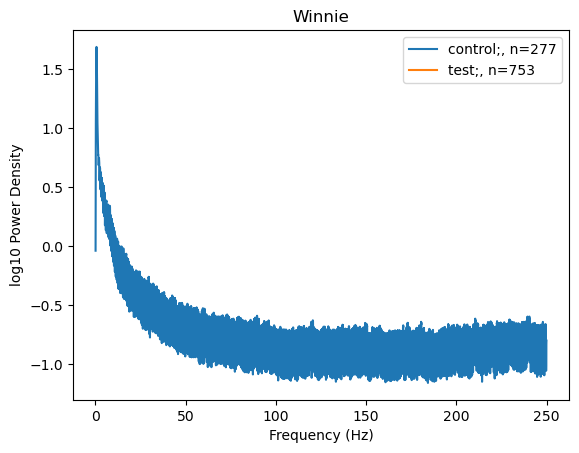

In [166]:
for name, result in spectrum_results.items():
    # power = np.average(
    #     (result["spectrums"]),
    #     axis=0,
    # )  # weights=result["weights"])
    # plt.plot(f, np.log10(power), label=name)

    weights = np.array(result["weights"])
    power = result["spectrums"] * f
    power = np.log10(power)
    ind = ~np.isnan(power).any(axis=1)
    power = power[ind]

    mid = np.average(power, axis=0, weights=weights[ind])
    mid = np.average(
        power,
        axis=0,
    )  # weights=weights)

    # mid = np.array(
    #     [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    # )
    # low = np.array(
    #     [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    # )
    # high = np.array(
    #     [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    # )
    plt.plot(f, mid, label=f"{name};, n={len(result['spectrums'])}")
    # plt.fill_between(f, low, high, alpha=0.5)


# plt.xlim(3, 20)
plt.legend()
plt.title(animal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("log10 Power Density")
# plt.xlim(3, 15)

# plt.ylim(-10,10)

# DEV

In [124]:
window_size = 2
from Analysis.utils import weighted_quantile

for interval_list in [outbound_intervals, inbound_intervals]:
    spectrums = []
    weights = []

    for interval in interval_list:
        rng = np.digitize(interval, results.time)
        if rng[1] - rng[0] < window_size:
            continue
        f, power, weight = power_spectrum(
            data=ahead_behind[rng[0] : rng[1]],
            window_size=window_size,
            sampling_rate=500,
        )
        spectrums.append(power)
        weights.append(weight)
    spectrums = np.array(spectrums)  # * f**1
    weights = np.array(weights)

    power = spectrums * f
    power = np.log10(power)
    # power = np.average(power, axis=0, weights=weights)

    mid = np.array(
        [weighted_quantile(power[:, ii], 0.5, weights) for ii in range(power.shape[1])]
    )
    low = np.array(
        [weighted_quantile(power[:, ii], 0.25, weights) for ii in range(power.shape[1])]
    )
    high = np.array(
        [weighted_quantile(power[:, ii], 0.75, weights) for ii in range(power.shape[1])]
    )

    plt.plot(f, mid)
    # plt.fill_between(f, low, high, alpha=0.5)

    # plt.plot(f, power)
    plt.xlim(0.5, 30)
    # plt.ylim(2, 3)

ValueError: operands could not be broadcast together with shapes (0,) (5001,) 

In [220]:
k = "waveform_features_group_name LIKE '%wtrack%'"
pop_keys = ((ClusterlessDecodingV1() & k) - ClusterlessAheadBehindDistance()).fetch(
    "KEY"
)

len(pop_keys)

44

In [224]:
ClusterlessAheadBehindDistance().populate(pop_keys[0])

[2024-08-14 12:37:16,328][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


TypeError: 'DataArray' object is not callable

In [234]:
time_slice = slice(0, 1000)
(
    (ClusterlessDecodingV1 & pop_keys[0])
    .fetch_results()
    .acausal_posterior[time_slice]
    .squeeze()
    .unstack("state_bins")
    .sum("state")
)

[2024-08-14 12:40:39,519][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


<xarray.DataArray 'acausal_posterior' (time: 597879, position: 224)>
array([[0.00454515, 0.00454515, 0.00454515, ..., 0.00454533, 0.00454533,
        0.00454533],
       [0.00422259, 0.00466854, 0.00467999, ..., 0.00467971, 0.00466931,
        0.00422342],
       [0.00411317, 0.00463676, 0.00472522, ..., 0.00472517, 0.00463785,
        0.0041141 ],
       ...,
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073],
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073],
       [0.00388988, 0.00443042, 0.00462171, ..., 0.00462215, 0.00443166,
        0.00389073]], dtype=float32)
Coordinates:
  * position  (position) float64 0.9854 2.956 4.927 6.898 ... 486.8 488.8 490.8
  * time      (time) float64 1.691e+09 1.691e+09 ... 1.691e+09 1.691e+09

In [243]:
time_slice = slice(0, 1000)

r = (ClusterlessDecodingV1 & pop_keys[0]).fetch_results()
r.acausal_posterior[time_slice]

[2024-08-14 12:43:26,340][WARNING]: Skipped checksum for file with hash: c0b1d9b5-af00-19fd-2082-dd1c6cf5af11, and path: /stelmo/nwb/analysis/Bilbo20230802/Bilbo20230802_5bf6681d-301a-401a-abc3-e1082d23cfc9.nc


<xarray.DataArray 'acausal_posterior' (intervals: 1, time: 597879,
                                       state_bins: 448)>
[267849792 values with dtype=float32]
Coordinates:
  * time        (time) float64 1.691e+09 1.691e+09 ... 1.691e+09 1.691e+09
  * state_bins  (state_bins) object MultiIndex
  * state       (state_bins) object 'Continuous' 'Continuous' ... 'Fragmented'
  * position    (state_bins) float64 0.9854 2.956 4.927 ... 486.8 488.8 490.8
Dimensions without coordinates: intervals

In [50]:
(ClusterlessDecodingV1 & pop_keys[0]).fetch_model()

ClusterlessDetector(clusterless_algorithm='clusterless_kde',
                    clusterless_algorithm_params={'block_size': 10000,
                                                  'position_std': 6.0,
                                                  'waveform_std': 24.0},
                    continuous_initial_conditions_types=[UniformInitialConditions(),
                                                         UniformInitialConditions()],
                    continuous_transition_types=[[RandomWalk(environment_name='', movement_var=6.0, movement_mean=0.0, use_manifold_...
                    environments=[Environment(environment_name='', place_bin_size=2.0, track_graph=<networkx.classes.graph.Graph object at 0x7f6ca2e22bb0>, edge_order=[(0, 1), (1, 2), (2, 3), (1, 4), (4, 5)], edge_spacing=15, is_track_interior=None, position_range=None, infer_track_interior=True, fill_holes=False, dilate=False, bin_count_threshold=0)],
                    infer_track_interior=True, no_spike_rate=1e-10,
                    observation_models=[ObservationModel(environment_name='', encoding_group=0, is_local=False, is_no_spike=False),
                                        ObservationModel(environment_name='', encoding_group=0, is_local=False, is_no_spike=False)],
                    sampling_frequency=500.0,
                    state_names=['Continuous', 'Fragmented'])

In [64]:
# ClusterlessAheadBehindDistance()
pop_keys = (
    (ClusterlessDecodingV1() & "position_group_name LIKE 'DLC%'")
    - ClusterlessAheadBehindDistance()
).fetch("KEY")

import jax

ClusterlessAheadBehindDistance().populate(pop_keys, processes=1)

[2024-08-21 10:10:27,409][WARNING]: Skipped checksum for file with hash: 508f8654-811d-aacf-ae73-50f995ec96f5, and path: /stelmo/nwb/analysis/Olive20220711/Olive20220711_0734f4a3-1e96-45b9-8f77-a11cbd64456f.nc


TypeError: unhashable type: 'numpy.ndarray'

In [66]:
%debug

> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/networkx/classes/reportviews.py(194)__getitem__()
    192                 f"try list(G.nodes)[{n.start}:{n.stop}:{n.step}]"
    193             )
--> 194         return self._nodes[n]
    195 
    196     # Set methods

[0 1]
> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/non_local_detector/analysis/distance1D.py(94)_get_distance_between_nodes()
     92 
     93 def _get_distance_between_nodes(track_graph, node1, node2):
---> 94     node1_pos = np.asarray(track_graph.nodes[node1]["pos"])
     95     node2_pos = np.asarray(track_graph.nodes[node2]["pos"])
     96     return np.sqrt(np.sum((node1_pos - node2_pos) ** 2))

array([0, 1])
'mental_position'
'mental_position'
*** NameError: name 'metal_edge' is not defined
*** NameError: name 'mental_edge' is not defined
> /home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/non_local_detector/analysis/distance1D.py(155)_s

In [63]:
(ClusterlessDecodingV1 & pop_keys[0]).fetch_model().environments[0].track_graph.nodes[
    0
]["pos"]

(91.0, 14.0)

In [97]:
from spyglass.decoding.v1.clusterless import ClusterlessDecodingSelection

pop_keys = (
    ClusterlessDecodingSelection() & "position_group_name LIKE 'DLC%'"
) - ClusterlessDecodingV1()
print(len(pop_keys))
ClusterlessDecodingV1() & pop_keys

# ClusterlessDecodingV1().populate(pop_keys,processes=1)
# Clusterl

4


nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters,results_path path to the results file,classifier_path path to the classifier file


In [98]:
ClusterlessAheadBehindDistance & pop_keys
ClusterlessDecodingV1 & pop_keys
pop_keys

nwb_file_name name of the NWB file,waveform_features_group_name,position_group_name,decoding_param_name a name for this set of parameters,encoding_interval descriptive name of this interval list,decoding_interval descriptive name of this interval list,estimate_decoding_params whether to estimate the decoding parameters
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_opto_control_interval,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_opto_test_interval,pos 1 valid times,0
Wallie20220922_.nwb,02_wtrack,DLC pos 1 valid times,ms_wtrack_contfrag_clusterless_causal,pos 1 valid times_stimulus_on_interval,pos 1 valid times,0


In [101]:
table = (
    ClusterlessDecodingV1 & "position_group_name LIKE 'DLC%'"
) - ClusterlessAheadBehindDistance()
pop_key = table.fetch("KEY")[0]
ClusterlessAheadBehindDistance().populate(pop_key)

[2024-08-21 11:24:29,432][WARNING]: Skipped checksum for file with hash: 8229df80-a4fd-883d-0341-1f9542cb6c22, and path: /stelmo/nwb/analysis/Frodo20230815/Frodo20230815_a1e6dccc-450f-4e4b-badf-7e3cbb17ef1c.nc
[2024-08-21 11:25:53,564][WARNING]: Skipped checksum for file with hash: 8229df80-a4fd-883d-0341-1f9542cb6c22, and path: /stelmo/nwb/analysis/Frodo20230815/Frodo20230815_a1e6dccc-450f-4e4b-badf-7e3cbb17ef1c.nc
[11:25:54][INFO] Spyglass: Writing new NWB file Frodo20230815_5A5F46R0VH.nwb


# Methodical Check for Decoding

In [11]:
# make list of keys you expect but aren't there
animal_list = animal_style.index
animal_list = [x for x in animal_list if x != "Banner"]

missing_clusterless = []
for animal in animal_list:
    dataset_key = {"animal": animal, "track_type": "lineartrack", "targeted_phase": 90}

    # get the keys for the data we're analyzing
    dataset = filter_opto_data(dataset_key)
    key_pairs = []
    for key in dataset.proj(position_interval_name="interval_list_name").fetch("KEY"):

        trial_keys = (
            TrialIntervals()
            * (TaskEpoch * (PositionIntervalMap() & key)).proj(
                waveform_features_group_name="interval_list_name"
            )
        ).fetch("nwb_file_name", "epoch", "waveform_features_group_name", as_dict=True)

        trial_keys
        if not (
            query := (
                ClusterlessDecodingV1()
                & "position_group_name LIKE 'DLC%'"
                & "encoding_interval LIKE '%valid times'"
                & trial_keys
            )
        ):
            print("No clusterless decoding", key)
            missing_clusterless.append(key)
            continue

datasets: 4
No clusterless decoding {'nwb_file_name': 'Winnie20220717_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220717_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220718_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
No clusterless decoding {'nwb_file_name': 'Winnie20220718_.nwb', 'position_interval_name': 'pos 3 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_phase_targeting'}
datasets: 2
No clusterless decoding {'nwb_file_name': 'Frodo20230810_.nwb', 'position_interval_name': 'pos 11 valid times', 'dio_event_name': 'stim', 'opto_infer_params_name': 'default_pulse_train'}
No clusterless decoding

In [12]:
from spyglass.decoding.v1.clusterless import (
    ClusterlessDecodingSelection,
    UnitWaveformFeaturesGroup,
)
from spyglass.common import TaskEpoch, PositionIntervalMap, interval_list_intersect
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
from spyglass.decoding.v1.clusterless import UnitWaveformFeatures
from spyglass.decoding.v1.core import PositionGroup
import spyglass.spikesorting.v0 as sgs
import spyglass.position.v1 as sgp
import pandas as pd

all_results = []
for key in missing_clusterless:
    results = {
        **key,
        "artifact": False,
        "spikesorting": False,
        "UnitWaveformFeatures": False,
        "UnitGroup": False,
        "PositionGroup": False,
        "DLCPosV1": False,
        "ClusterlessDecodingSelection": False,
        "ClusterlessDecode": False,
    }
    if "Banner" in key["nwb_file_name"]:
        continue

    sort_interval = ((PositionIntervalMap() * TaskEpoch()) & key).fetch1(
        "interval_list_name"
    )
    sort_key = {
        "nwb_file_name": key["nwb_file_name"],
        "sort_interval_name": sort_interval,
        "sorter": "clusterless_thresholder",
    }
    if sgp.DLCPosV1 & (TaskEpoch * PositionIntervalMap() & key):
        results["DLCPosV1"] = True

    if not (sgs.ArtifactDetection() & sort_key):
        all_results.append(results)
        # continue
    results["artifact"] = True

    merge_keys = (
        (SpikeSortingOutput().CuratedSpikeSorting() & sort_key)
        .proj(spikesorting_merge_id="merge_id")
        .fetch("KEY")
    )
    if merge_keys:
        # all_results.append(results)
        # continue
        results["spikesorting"] = True

    if UnitWaveformFeatures() & merge_keys:
        # all_results.append(results)
        # continue
        results["UnitWaveformFeatures"] = True

    decode_key = {
        "nwb_file_name": key["nwb_file_name"],
        "position_group_name": "DLC " + key["position_interval_name"],
    }
    if UnitWaveformFeaturesGroup() & decode_key:
        results["UnitGroup"] = True
    if PositionGroup() & decode_key:
        results["PositionGroup"] = True

    if ClusterlessDecodingSelection() & decode_key:
        # all_results.append(results)
        # continue
        results["ClusterlessDecodingSelection"] = True

    if ClusterlessDecodingV1() & decode_key:
        results["ClusterlessDecode"] = True
        continue
    all_results.append(results)
    # break
all_results = pd.DataFrame(all_results)
all_results

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,DLCPosV1,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220717_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
1,Winnie20220717_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
2,Winnie20220718_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
3,Winnie20220718_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
4,Frodo20230810_.nwb,pos 11 valid times,stim,default_pulse_train,True,True,True,True,False,False,False,False
5,Frodo20230811_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
6,Totoro20220607_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
7,Totoro20220607_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
8,Totoro20220610_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False
9,Totoro20220610_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False,False


In [10]:
all_results

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,DLCPosV1,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220712_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
1,Winnie20220712_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
2,Winnie20220712_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
3,Winnie20220712_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
4,Winnie20220713_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
438,Bilbo20230725_.nwb,pos 9 valid times,stim,default_pulse_train,True,False,False,True,False,False,False,False
439,Bilbo20230726_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
440,Bilbo20230726_.nwb,pos 1 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False
441,Bilbo20230726_.nwb,pos 3 valid times,stim,default_pulse_train,True,False,False,False,False,False,False,False


In [8]:
(PositionIntervalMap() * TaskEpoch) & key

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,epoch the session epoch for this task and apparatus(1 based),position_interval_name name of the corresponding interval,task_name,camera_name,task_environment the environment the animal was in,camera_names list of keys corresponding to entry in CameraDevice
Winnie20220714_.nwb,12_lineartrack,12,pos 11 valid times,lineartrack,None,none,=BLOB=


In [20]:
all_results
# sgs.ArtifactDetection() & sort_key

,nwb_file_name,position_interval_name,dio_event_name,opto_infer_params_name,artifact,spikesorting,UnitWaveformFeatures,UnitGroup,PositionGroup,ClusterlessDecodingSelection,ClusterlessDecode
0,Winnie20220720_.nwb,pos 1 valid times,stim,default_phase_targeting,False,False,False,False,False,False,False
1,Winnie20220720_.nwb,pos 11 valid times,stim,default_phase_targeting,False,False,False,False,False,False,False
2,Winnie20220722_.nwb,pos 1 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
3,Winnie20220722_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
4,Frodo20230814_.nwb,pos 1 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
5,Frodo20230814_.nwb,pos 11 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
6,Frodo20230814_.nwb,pos 15 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
7,Frodo20230814_.nwb,pos 17 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
8,Frodo20230814_.nwb,pos 3 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False
9,Frodo20230814_.nwb,pos 5 valid times,stim,default_phase_targeting,True,True,True,True,False,False,False


In [13]:
sgs.SpikeSortingRecording().full_table_name

'`spikesorting_recording`.`__spike_sorting_recording`'

In [31]:
sort_key = {
    "nwb_file_name": key["nwb_file_name"],
    "sort_interval_name": sort_interval,
    "sorter": "clusterless_thresholder",
}
merge_keys = (
    (SpikeSortingOutput().CuratedSpikeSorting() & sort_key)
    .proj(spikesorting_merge_id="merge_id")
    .fetch("KEY")
)

UnitWaveformFeatures() & merge_keys

spikesorting_merge_id,features_param_name a name for this set of parameters,analysis_file_name name of the file,object_id the NWB object that stores the waveforms
1db31007-9bf9-4780-5668-fa661badbaa3,amplitude,Winnie20220719_U5EERHJ56F.nwb,6b3b832c-0439-43d3-b212-85e423a03d2e
2277ad5b-06b7-7489-9cff-da64a45ef979,amplitude,Winnie20220719_5YDD40KYWB.nwb,f26ca6e5-e25a-4e2d-a86e-d4ac75f07d7e
403b0663-af48-aecc-e9af-e1bfa5262c2c,amplitude,Winnie20220719_CXTI7QNZO5.nwb,040a5a06-367c-44db-a7b4-9fc5ce7699c5
4647b9e7-7d01-2bb0-d6a7-e78df37f3b4a,amplitude,Winnie20220719_VNMCMOJRPI.nwb,b3a7b80f-dcde-485c-96a2-3df468af2dad
46960539-3cb6-6ac2-deec-d5863495bce5,amplitude,Winnie20220719_X5H4HGA4P6.nwb,3151af8e-da66-4e76-9ca6-945d958348c1
4cb94d10-1f9a-2021-34e2-53deedd1b3f0,amplitude,Winnie20220719_HWU8155ELK.nwb,400e82e1-564e-425d-9a36-ccca4443ade2
66a48010-ef5d-6ff7-91a2-c6a1fc1ede92,amplitude,Winnie20220719_ITD8IR2XHV.nwb,1912c33f-66b2-4140-87dc-356551c0d611
6da24820-202f-12f9-a9ea-a002acf79e9b,amplitude,Winnie20220719_2E2UXX51JI.nwb,4d5489f2-bc73-4509-88c5-d3020f14a6fc
7c3cf1ff-31c0-5517-7ec7-4010d6936b38,amplitude,Winnie20220719_5QSN8TUY03.nwb,ad2895f4-f3af-4447-a16d-409a579f5e46
81fbf48b-895b-41b1-df1d-a27101ed690f,amplitude,Winnie20220719_524RNGDCUW.nwb,a0596e36-5a9a-4bd1-9f7b-e27f93233249
